### Phenomenon of localization in symmetric tridiagonal real matrices

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [6]:
# Generate the diagonal and subdiagonal elements of the tridiagonal matrix
n = 100
diag = np.random.rand(n)
subdiag = np.random.rand(n-1)

T = np.diag(diag) + np.diag(subdiag, k=1) + np.diag(subdiag, k=-1)
print(T)

[[0.72357051 0.48873558 0.         ... 0.         0.         0.        ]
 [0.48873558 0.91180618 0.1323677  ... 0.         0.         0.        ]
 [0.         0.1323677  0.47038478 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.19024505 0.54151472 0.        ]
 [0.         0.         0.         ... 0.54151472 0.76820631 0.3031506 ]
 [0.         0.         0.         ... 0.         0.3031506  0.14463129]]


In [26]:
# Obtain the eigenvalues and eigenvectors of the tridiagonal matrix
ew, ev = eigh_tridiagonal(diag, subdiag)

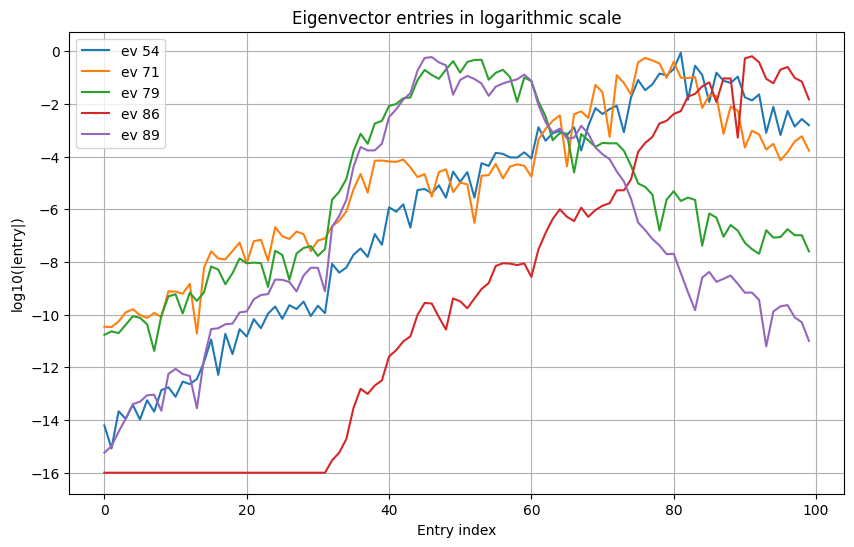

In [ ]:
# Plot the eigenvectors entries

def plot_ev_entries(ev, n_ev=3):
    plt.figure(figsize=(10, 6))
    i = 0
    idxs = np.random.choice(np.arange(0, len(ev)), size=n_ev, replace=False)
    for i in idxs:
        plt.plot(np.log10(np.abs(ev[:, i]) + 1e-16), label=f'ev {i}')
    plt.title("Eigenvector entries in logarithmic scale")
    plt.xlabel("Entry index")
    plt.ylabel("log10(|entry|)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_ev_entries(ev, 5)

In [ ]:
# Obtain the proportion of eigenvector entries greater than 10^-10

def count_significant_entries(matrix, threshold=2.22e-16):
    count = 0
    for entry in matrix.flat:
        if entry > threshold:
            count += 1
    return count

ev_significant_entries = count_significant_entries(ev, 10e-10)
print(ev_significant_entries/len(ev)**2)

0.348


In [37]:
# Laplacian matrix
lap_diag = np.full(n, -2)
lap_subdiag = np.full(n-1, 1)

lap = np.diag(lap_diag) + np.diag(lap_subdiag, k=1) + np.diag(lap_subdiag, k=-1)
print(lap)

[[-2  1  0 ...  0  0  0]
 [ 1 -2  1 ...  0  0  0]
 [ 0  1 -2 ...  0  0  0]
 ...
 [ 0  0  0 ... -2  1  0]
 [ 0  0  0 ...  1 -2  1]
 [ 0  0  0 ...  0  1 -2]]


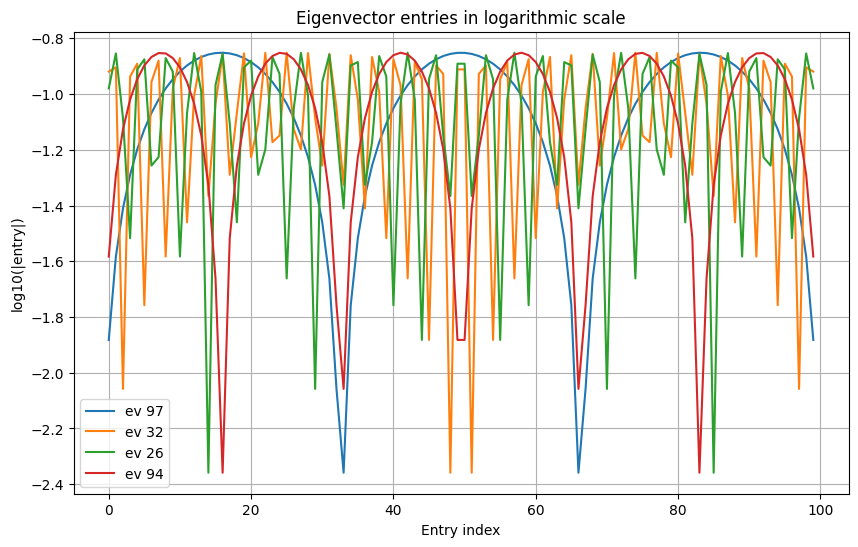

0.5062


In [63]:
# Obtain the eigenvalues and eigenvectors of the Laplacian matrix
lap_ew, lap_ev = eigh_tridiagonal(lap_diag, lap_subdiag)

# Plot the Laplacian eigenvectors entries
plot_ev_entries(lap_ev, 4)

# Obtain the proportion of eigenvector entries greater than 10^-10
lap_ev_significant_entries = count_significant_entries(lap_ev, 10e-10)
print(lap_ev_significant_entries/len(lap_ev)**2)